In [3]:
using FFTW
using DSP  # Import DSP for hanning function
using Plots
using Distributions

In [4]:
N = 2000
μ, σ = 0.0, 1.0  # Mean and standard deviation of the normal distribution
𝑁 = Normal(μ, σ)
x = rand(𝑁, N)

y = filt([1], [1, a], x)
Yf = fft(y)
Py = 1 / N * abs.(Yf).^2
# f = range(-0.5, stop=0.5, length=N) * N
# Sy = abs.(1 ./ abs2.(fft([1, a], N)))

# f = fftfreq(N)
f =  .* N  # Adjusting the frequency vector
Sy = abs.((1 ./ abs2.(fftshift(Yf))))

plot(f, -10 * log10.(abs2.(fftshift(Py))), alpha=0.65, label="Periodogram")
plot!(f, fftshift(Sy), color="yellow", lw=2, label="True spectrum")


LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///Users/valiha/Developer/SSP/Homework/3/In[4]#15:6\[90mIn[4]:15:6[0;0m]8;;\
# f = fftfreq(N)
f =  [48;2;120;70;70m.*[0;0m N  # Adjusting the frequency vector
[90m#    └┘ ── [0;0m[91mnot a unary operator[0;0m

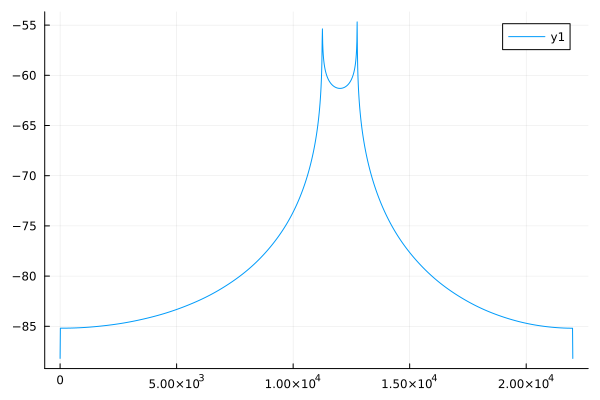

In [5]:
using DSP, Plots

fs = 44_000;
fc = 12_000;
t = 0:1/fs:1024*(1/fc)

m = sinc.(fc/8*t)

y = cos.(2*pi*fc*t) .* m

Y = periodogram(y; fs=fs)

plot(Y.freq, DSP.pow2db.(Y.power))

# References
- [ ] [1.2  Power spectrum estimation](https://perso.esiee.fr/~bercherj/Lectures_SignalProcessing/Lecture3_RandomSignals.html#Power-spectrum-estimation)
- [ ] [How to see the output from DSP.Periodograms.periodogram?](https://discourse.julialang.org/t/how-to-see-the-output-from-dsp-periodograms-periodogram/26732/2)